In [27]:
%matplotlib inline
import sympy as sp
from sympy import cos, sin, pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.style.use('pub_fast')
sp.init_printing()
sp.var('θ, M0, Mπ, A, B, C')

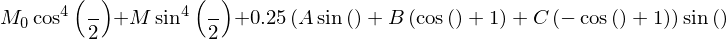

In [12]:
def M(θ):
    return sp.cos(θ/2)**4*M0+sp.sin(θ/2)**4*Mπ+(1/4)*sp.sin(θ)*(sp.sin(θ)*A+(1+sp.cos(θ))*B+(1-sp.cos(θ))*C)
M(θ)

In [13]:
4*(M(sp.pi/4)-M(-sp.pi/4)-1/sp.sqrt(2)*(M(sp.pi/2)-M(-sp.pi/2))).simplify()

In [14]:
2*(M(sp.pi/2)-M(-sp.pi/2)).simplify()

In [15]:
(2*(M(sp.pi/2)+M(-sp.pi/2))-(M0+Mπ)).simplify()

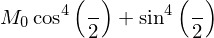

In [16]:
sp.expand_trig(sp.cos(θ/2)**4*M0+sp.sin(θ/2)**4)

0
-4.61677387493098 -4.61677387493098 -4.616773874930985


/Users/fergusbarratt/miniconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


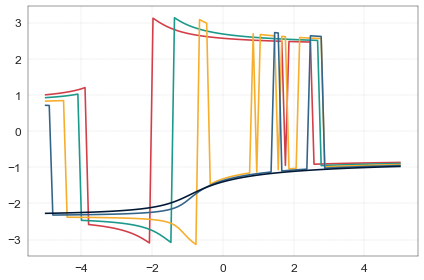

In [33]:
import scipy.optimize as opt
a, b, c, d = 1, 2, 3, 4
def M(x): return a*sp.sin(2*x)+b*sp.sin(2*x)+c*sp.cos(x)+d*sp.sin(x)

def M_(θ):
    return (cos(θ/2)**4)*M(0)+sin(θ/2)**4*M(pi)+(1/4)*sin(θ)**2*(2*(M(pi/2)+M(-pi/2))-(M(0)+M(pi)))+\
        (1/2)*sin(θ)*(M(pi/2)-M(-pi/2))+\
        (1/4)*sin(θ)*cos(θ)*(4*((M(pi/4)-M(-pi/4))-(1/sqrt(2))*(M(pi/2)-M(-pi/2))))

def MM(x):
    A = (M(0)+M(np.pi)).evalf()
    B = (M(0)-M(np.pi)).evalf()
    C = (M(np.pi/2)+M(-np.pi/2)).evalf()
    D = (M(np.pi/2)-M(-np.pi/2)).evalf()
    E = (M(np.pi/4)-M(-np.pi/4)).evalf()
    a, b, c, d = 1/4*(2*E-np.sqrt(2)*D), 1/4*(A-C), 1/2*D, 1/2*B
    return a*np.sin(2*x)+b*np.cos(2*x)+c*np.sin(x)+d*np.cos(x)
    #return (1/4)*((A-C)*np.cos(2*x)+(2*E-np.sqrt(2)*D)*np.sin(2*x))+(1/2)*(B*np.cos(x)+D*np.sin(x))

def MM2(x):
    A = float((M(0)+M(np.pi)).evalf())
    B = float((M(0)-M(np.pi)).evalf())
    C = float((M(np.pi/2)+M(-np.pi/2)).evalf())
    D = float((M(np.pi/2)-M(-np.pi/2)).evalf())
    E = float((M(np.pi/4)-M(-np.pi/4)).evalf())
    a, b, c, d = 1/4*(2*E-np.sqrt(2)*D), 1/4*(A-C), 1/2*D, 1/2*B

    P = np.sqrt(a**2+b**2)
    u = np.arctan2(b, a)
    
    Q = np.sqrt(c**2+d**2)
    v = np.arctan2(d, c)
    
    return P*np.sin(2*x+u)+Q*np.sin(x+v)

    
print((M_(θ)-M(θ)).simplify())

print(MM(5), M(5).evalf(), MM2(5))

#x = np.linspace(-np.pi, np.pi)
#plt.plot(x, [M_(X).evalf() for X in x])
#plt.plot(x, MM(x))
#plt.plot(x, MM2(x))
#x_= opt.minimize_scalar(MM2).x
#plt.scatter(x_, MM2(x_))

def mini(a, b, c, d):
    def M(x): return a*sp.sin(2*x)+b*sp.sin(2*x)+c*sp.cos(x)+d*sp.sin(x)
    def MM2(x):
        A = float((M(0)+M(np.pi)).evalf())
        B = float((M(0)-M(np.pi)).evalf())
        C = float((M(np.pi/2)+M(-np.pi/2)).evalf())
        D = float((M(np.pi/2)-M(-np.pi/2)).evalf())
        E = float((M(np.pi/4)-M(-np.pi/4)).evalf())
        a, b, c, d = 1/4*(2*E-np.sqrt(2)*D), 1/4*(A-C), 1/2*D, 1/2*B

        P = np.sqrt(a**2+b**2)
        u = np.arctan2(b, a)

        Q = np.sqrt(c**2+d**2)
        v = np.arctan2(d, c)

        return P*np.sin(2*x+u)+Q*np.sin(x+v)
    return opt.minimize_scalar(MM2, method='brent').x
X = np.linspace(-5, 5, 100)
def wrap(x): return np.arctan2(np.sin(x), np.cos(x))
Y = np.linspace(0, 5, 5)
for y in Y:
    plt.plot(X, [wrap(mini(x, b, c, y)) for x in X]);

In [ ]:
from rotosolve import double_rotosolve, gate